# Part II - Ford GoBike System Dataset
## by Kolawole Riliwan

## Investigation Overview

> The goal of this presentation is to show and explain the following from the dataset:
- The duration of trips in this bike sharing system.
- The gender of users of the bike sharing system.
- The user type of users in this system.
- Ten bikes with the highest accumulated usage duration.


## Dataset Overview

>  This dataset is made up of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of California State, USA. The dataset is made up of 16 columns and 183412 rows. The dataset has 183412 entries for each column (including missing values). 7 columns of this dataset have float data type, 2 columns have int data type while the remaining 7 columns are of string data type. The main features of my interest in this dataset are Bikes, duration of trips, user types, gender of users and lastly, stations.


### Summary of key insights from the dataset:

> Majority of the trips of this bike sharing system fall below 2000 secs (less than 34 minutes).

> In this bike sharing system, there are more male users than female users. Also, some users gave "other" as their gender.

> There are more subscribers than customers. In fact, majority of the users are subscribers.

> The bike with the ID 5481 accumulated the highest duration of usage. It was on the road for 217,614 seconds.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

## (Visualization 1)

- Title: Distribution of duration across all trips.

- Insight: Users of this bike sharing system rarely go on long-distance trips as the duration of majority of the trips fall below 2000 secs (less than 34 minutes).

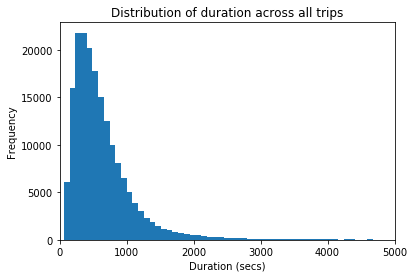

In [3]:
plt.hist(data = df_bike, x = 'duration_sec', bins = 1000)
plt.xlabel('Duration (secs)')
plt.ylabel('Frequency')
plt.title('Distribution of duration across all trips')
plt.xlim((0, 5000));

## (Visualization 2)

- Title: Number of Users for each Member Gender.
- Insight: There are more male users than female users. Also, there is a third gender type named **"other"**, representing a very small percentage of users.

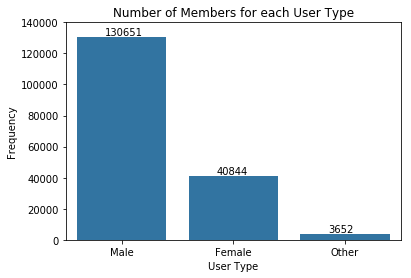

In [4]:
gender = ['Male', 'Female', 'Other']
gender_type = pd.api.types.CategoricalDtype(ordered=True, categories=gender)
df_bike['member_gender'] = df_bike['member_gender'].astype(gender_type)
sb.countplot(data = df_bike, x = 'member_gender', color = sb.color_palette()[0])
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('Number of Members for each User Type')
plt.ylim((0,140000));

# Let us add value labels.
gender_count = df_bike['member_gender'].value_counts()
for i in range(gender_count.shape[0]):
    count = gender_count[i]
    count_string = '{}'.format(count)  
    plt.text(i-0.15, count, count_string, va='bottom')

## (Visualization 3)

- Title: User types of members.
- Insight: There are more subscribers than customers. In fact, majority of the users of this bike sharing system are subscribed users and not mere customers.

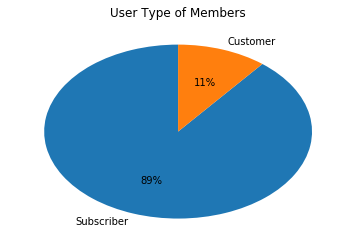

In [5]:
user_type = df_bike['user_type'].value_counts()
def pie(varb, tit):
    plt.pie(varb, labels=varb.index, startangle = 90, autopct = '%0.0f%%')
    plt.title(tit);   
pie(user_type, 'User Type of Members')

## (Visualization 4)

- Title: Ten most used bikes based on total duration accumulated
- Insight: The top three bikes with the highest accumulated usage duration are; Bike_5481, Bike_5282 and Bike_5561. 

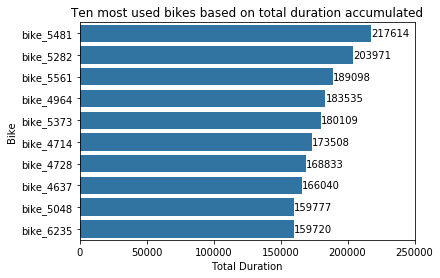

In [6]:
bike_dur = df_bike.groupby('bike_id')['duration_sec'].sum().reset_index()
bike_dur = bike_dur.sort_values(by=['duration_sec'], ascending=False).reset_index().drop('index',axis=1)
bike_duration = bike_dur[:10]
bike_duration['bike_id'] = bike_duration['bike_id'].astype('str')
bike_duration['bike'] = 'bike_' + bike_duration['bike_id']
sb.barplot(x='duration_sec', y='bike', data=bike_duration, color = sb.color_palette()[0])
plt.xlabel('Total Duration')
plt.ylabel('Bike')
plt.title('Ten most used bikes based on total duration accumulated')
plt.xlim((0, 250000));
for i in range(len(bike_duration)):
        count = bike_duration['duration_sec'][i]
        count_string = '{}'.format(count)
        plt.text(count+1, i, count_string, va='center')

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 350982 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/